In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
df = pd.read_csv("../csv/feedback-v2.csv")
df.columns = df.columns.str.strip()

In [4]:
new_columns = {
    'Qual seu nível de conhecimento sobre tipos de estudos experimentais (primários, secundários e terciários) antes da disciplina?': 'Estudos experimentais (antes)',
    'Qual seu nível de conhecimento sobre experimento controlado antes da disciplina?': 'Experimento controlado (antes)',
    'Qual seu nível de conhecimento sobre estudo de caso antes da disciplina?': 'Estudo de caso (antes)',
    'Qual seu nível de conhecimento sobre Survey antes da disciplina?': 'Survey (antes)',
    'Qual seu nível de conhecimento sobre análise estatística de experimentos antes da disciplina?': 'Análise estatística de experimentos (antes)',
    'Qual seu nível de conhecimento sobre análise qualitativa antes da disciplina?': 'Análise qualitativa (antes)',
    'Qual seu nível de conhecimento sobre revisão sistemática da literatura (RSL) antes da disciplina?': 'RSL (antes)',
    'Qual seu nível de conhecimento sobre tipos de estudos experimentais (primários, secundários e terciários) após da disciplina?': 'Estudos experimentais (depois)',
    'Qual seu nível de conhecimento sobre experimento controlado após a disciplina?': 'Experimento controlado (depois)',
    'Qual seu nível de conhecimento sobre estudo de caso após a disciplina?': 'Estudo de caso (depois)',
    'Qual seu nível de conhecimento sobre Survey após a disciplina?': 'Survey (depois)',
    'Qual seu nível de conhecimento sobre análise estatística de experimentos após a disciplina?': 'Análise estatística de experimentos (depois)',
    'Qual seu nível de conhecimento sobre análise qualitativa após a disciplina?': 'Análise qualitativa (depois)',
    'Qual seu nível de conhecimento sobre revisão sistemática da literatura (RSL) após a disciplina?': 'RSL (depois)'
}

In [5]:
df = df[list(new_columns.keys())].rename(columns=new_columns)

In [6]:
methods = {
    "Estudos experimentais": (
        "Estudos experimentais (antes)",
        "Estudos experimentais (depois)"
    ),
    "Experimento controlado": (
        "Experimento controlado (antes)",
        "Experimento controlado (depois)"
    ),
    "Estudo de caso": (
        "Estudo de caso (antes)",
        "Estudo de caso (depois)"
    ),
    "Survey": (
        "Survey (antes)",
        "Survey (depois)"
    ),
    "Análise estatística de experimentos": (
        "Análise estatística de experimentos (antes)",
        "Análise estatística de experimentos (depois)"
    ),
    "Análise qualitativa": (
        "Análise qualitativa (antes)",
        "Análise qualitativa (depois)"
    ),
    "RSL": (
        "RSL (antes)",
        "RSL (depois)"
    )
}

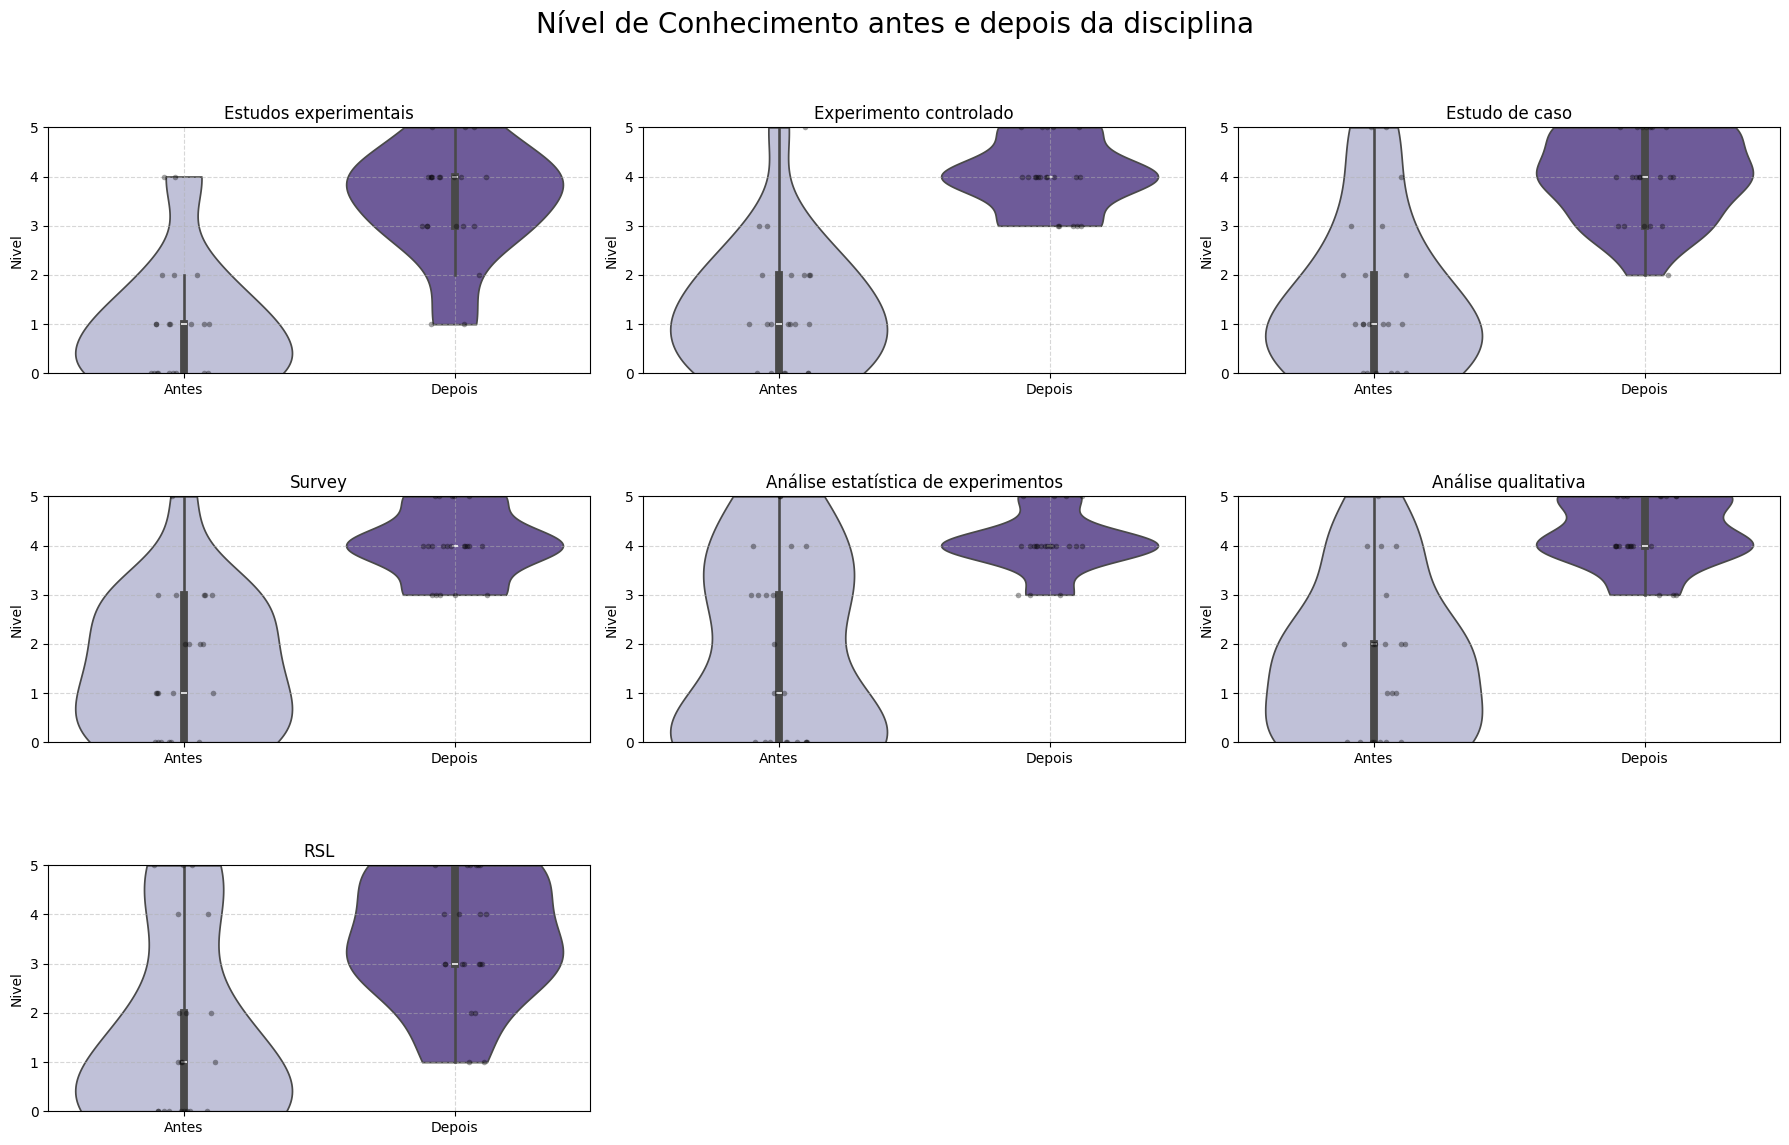

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for index, (metodo, (antes, depois)) in enumerate(methods.items()):
    dados_plot = pd.DataFrame({
        'Conhecimento': pd.concat([df[antes], df[depois]], ignore_index=True), 
        'Tempo': ['Antes'] * len(df) + ['Depois'] * len(df) 
    })

    # Violinplot traz visualização de densidade mais suave
    sns.violinplot(
        x='Tempo', y='Conhecimento', data=dados_plot,
        palette=['#bcbddc','#6a51a3'], hue='Tempo', split=False, inner="box",
        ax=axes[index], dodge=False, cut=0
    )

    # Stripplot mostra pontos individuais com jitter leve (apenas visual)
    sns.stripplot(
        x='Tempo', y='Conhecimento', data=dados_plot,
        color='k', size=4, jitter=0.12, ax=axes[index], dodge=False, alpha=0.36
    )

    # Ajustes visuais
    axes[index].set_title(f"{metodo.split('-')[-1].strip()}")
    axes[index].set_ylim(0, 5)
    axes[index].set_ylabel('Nivel')
    axes[index].set_xlabel('')
    axes[index].grid(True, linestyle="--", alpha=0.5)

    # Ajustar legenda para não duplicar "Time" por conta do violinplot
    legend = axes[index].get_legend()
    if legend:
        handles, labels = axes[index].get_legend_handles_labels()
        axes[index].legend(handles[:2], ['Antes', 'Depois'], title='Tempo')

for j in range(len(methods), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Nível de Conhecimento antes e depois da disciplina', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(hspace=0.5)
plt.show()